# Neural Network for Natural Language Processing

In this project, I am about to present basic neural network usage for sentiment analysis task. In this relatively short Natural Language Processing example, I will work on <a href="http://ai.stanford.edu/~amaas/data/sentiment/">IMDB Dataset</a>, provided by <i>Stanford Artificial Intelligence Laboratory</i>. It consists of 50,000 movie reviews. The aim of the prediction is to correctly classify reviews as negative or positive. Here, I am going to use TensorFlow and Keras to build the neural network. All the computations will be held in Google Colab.

Firstly, since this work will be performed in Google Colab, I need to mount Google Drive to access the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Next, we need to import all the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter

Now we can load the dataset and make a quick overview of the first 5 rows.

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


As we can see, there is one column with movie review and the other one with its sentiment. I will check now if the dataset is imbalanced.

In [6]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

Our dataset consists of equal number of positive and negative reviews. In the next cell I will make list consisting of the words and their count in the whole dataset.

In [0]:
Counter(" ".join(df["review"]).lower().split()).most_common(100)

[('the', 638861),
 ('a', 316615),
 ('and', 313637),
 ('of', 286661),
 ('to', 264573),
 ('is', 204876),
 ('in', 179807),
 ('i', 141587),
 ('this', 138483),
 ('that', 130140),
 ('it', 129614),
 ('/><br', 100974),
 ('was', 93258),
 ('as', 88242),
 ('with', 84590),
 ('for', 84510),
 ('but', 77864),
 ('on', 62890),
 ('movie', 61492),
 ('are', 57009),
 ('his', 56870),
 ('not', 56765),
 ('you', 55600),
 ('film', 55086),
 ('have', 54423),
 ('he', 51062),
 ('be', 50901),
 ('at', 45259),
 ('one', 44983),
 ('by', 43359),
 ('an', 42330),
 ('they', 40860),
 ('from', 39322),
 ('all', 38570),
 ('who', 38326),
 ('like', 37281),
 ('so', 35972),
 ('just', 34259),
 ('or', 33300),
 ('has', 32610),
 ('about', 32398),
 ('her', 31244),
 ("it's", 31212),
 ('if', 30794),
 ('some', 30165),
 ('out', 28980),
 ('what', 28008),
 ('very', 26908),
 ('when', 26904),
 ('there', 26079),
 ('more', 25869),
 ('would', 23807),
 ('even', 23681),
 ('my', 23473),
 ('good', 23467),
 ('she', 23418),
 ('their', 22604),
 ('only', 

Among them, we have some HTML tags. I will now replace them with empty strings. 

In [0]:
df['review'] = df['review'].str.replace('<br />','')
df['review'] = df['review'].str.lower()

The histogram below shows the frequencies of sentences length.

Text(0.5, 1.0, 'Words occurrence frequency')

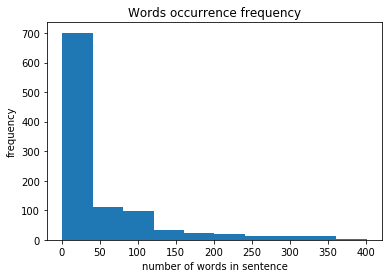

In [0]:
plt.figure()
plt.hist(df['review'].str.split().apply(len).value_counts())
plt.xlabel('number of words in sentence')
plt.ylabel('frequency')
plt.title('Words occurrence frequency')

The figure above tells that most of the reviews is shorter than 50 words.

In [0]:
print('The maximum length of a sentence is: ',np.max(df['review'].str.split().apply(len).value_counts()))
print('The average lenth of a sentence is: ', np.average(df['review'].str.split().apply(len).value_counts()))

The maximum length of a sentence is:  401
The average lenth of a sentence is:  48.732943469785575


As we can see, while there are some extraordinary long reviews, the average length is below 49 words.

For our machine learning algorithm, we need to encode the positive/negative classes to numerical values.

In [0]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


Now positive reviews are marked as 1, while negative as 0. The next step is to separate the dependent variable and split the date into training and test sets. 

In [0]:
sentences = np.array(df['review'])
labels = np.array(df['sentiment'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size = 0.2)

After that, we need to define neural network using Keras. It is just an example, since these networks can be much more complex. The only limit is the computational power accessible.

In [0]:
vocab_size = 20000
embedding_dim = 150 
max_length =  400
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
   
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 150)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 400, 128)          110080    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

After building the neural network, the only thing that left is to define the way of learning the model.

In [0]:
model.compile(loss = 'binary_crossentropy',
            optimizer = Adam(learning_rate=0.001),
            metrics = ['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

def lr_decay(epoch, initial_learningrate = 0.001):
    return initial_learningrate * 0.9 ** epoch

num_epochs = 10
history = model.fit(training_padded, y_train,
                    epochs=num_epochs,
                    callbacks=[LearningRateScheduler(lr_decay),
                              callback],
                    batch_size = 512,
                    validation_data = (testing_padded, y_test),
                    verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 34s 857us/sample - loss: 0.4113 - accuracy: 0.7967 - val_loss: 0.5189 - val_accuracy: 0.8656
Epoch 2/10
40000/40000 [==============================] - 23s 576us/sample - loss: 0.1958 - accuracy: 0.9253 - val_loss: 0.4857 - val_accuracy: 0.8869
Epoch 3/10
40000/40000 [==============================] - 23s 583us/sample - loss: 0.1187 - accuracy: 0.9578 - val_loss: 0.3838 - val_accuracy: 0.8697
Epoch 4/10
40000/40000 [==============================] - 23s 578us/sample - loss: 0.0634 - accuracy: 0.9792 - val_loss: 0.3603 - val_accuracy: 0.8462
Epoch 5/10
40000/40000 [==============================] - 23s 580us/sample - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.3408 - val_accuracy: 0.8801
Epoch 6/10
40000/40000 [==============================] - 23s 579us/sample - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.4576 - val_accuracy: 0.8805
Epoch 7/10
40000/40000 [====================

After training and validating our model, we can ilustrate its performance on a graph.

vocab_size:  20000


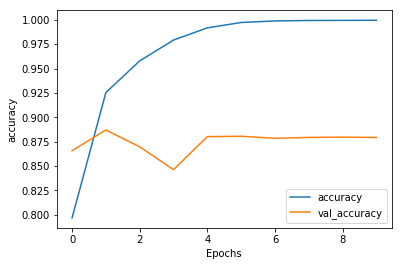

vocab_size:  20000


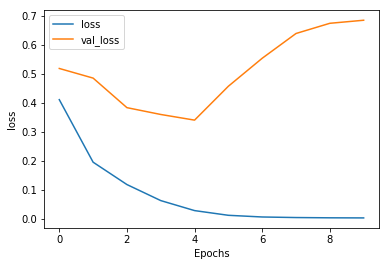

In [0]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.title(print('vocab_size: ',vocab_size))
    plt.legend([string, 'val_' + string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

The above graphs show that the training accuracy is significantly higher than the validation one. The loss is on training, at the last epoch comes to nearly 0, while for the latter, at the 4th epoch, it starts to continously grow. Still, with such balanced class, we achieved an accuracy around <b>0.88</b>, which is good result. This basic example is an evidence, that in relatively short time we can get quite reliable machine learning model.